<a href="https://colab.research.google.com/github/SimraRafiq/Deep_Learning-assignment/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import pathlib
import cv2
directory = pathlib.Path(r"/content/drive/MyDrive/archive/flowers")
flowers = []
features = []
labels = []
# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      #imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgarr,(800,800))
      features.append(imgarr)

tulip
flowers
sunflower
dandelion
rose
daisy


In [43]:
imgarr.shape

(800, 800)

In [44]:
print(imgarr)

[[191 191 191 ... 189 189 189]
 [191 191 191 ... 189 189 189]
 [191 191 191 ... 189 189 189]
 ...
 [194 194 194 ...  46  26  26]
 [194 194 194 ...  46  26  26]
 [194 194 194 ...  46  26  26]]


In [45]:
type(imgarr)

numpy.ndarray

In [46]:
len(imgarr)


800

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


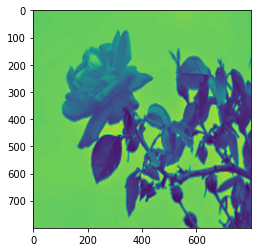

In [71]:
import matplotlib.pyplot as plt
print(train_labels[0])
plt.imshow(imgarr)

In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [54]:
x=imgarr[:,0:-1]
y=imgarr[:,-1]


In [55]:
from sklearn.model_selection import train_test_split
train_img,test_img,train_labels,test_labels=train_test_split(x,y,test_size=0.40,random_state=1) 

In [56]:
train_img.shape

(480, 799)

In [57]:
len(train_labels)

480

In [58]:

train_labels

array([ 42,  38,  31, 194,  32,  30,  47, 190,  46,  31,  44, 185, 191,
       190, 190, 189, 190,  32,  41,  44,  76,  31, 191,  23,  31, 193,
       212,  48,  31,  30,  36,  45,  36,  37,  30,  44, 189,  91,  44,
        46,  48, 198,  32,  44, 190,  29, 101, 194,  47,  38, 191,  59,
        46,  27, 191, 192,  58,  27,  69, 200,  38,  48,  26, 127, 192,
        45,  29,  37, 190,  33,  36, 188,  41,  62,  46,  32,  91,  30,
        34, 191, 191, 189,  29, 114,  65, 191,  35, 191,  32, 160,  39,
       189,  31,  32, 114, 219,  41,  41, 193,  32, 189,  32, 111,  15,
       193,  47,  62,  31, 191,  65, 194,  45,  48, 191,  43,  81,  38,
       189,  48,  52, 192,  34, 191,  28, 214, 194, 189, 197, 195,  86,
        31,  33,  39, 194,  38,  33,  44,  80,  30,  16,  35,  37, 189,
       194, 204,  43, 217,  87,  34,  50, 190, 190, 188,  34, 189, 190,
       190,  31,  33,  24, 191, 194, 192, 197,  31,  41, 106,  25,  44,
        35,  37,  47, 200,  45, 190,  40, 193,  45, 186,  46,  4

In [59]:
test_img.shape

(320, 799)

In [60]:
len(test_labels)

320

In [61]:
train_img[4]

array([194, 194, 194, 194, 194, 194, 193, 193, 193, 193, 193, 193, 193,
       193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193,
       192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 193, 193,
       193, 193, 193, 193, 194, 194, 194, 194, 195, 195, 195, 195, 195,
       195, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196,
       196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196,
       196, 196, 196, 196, 196, 196, 197, 197, 196, 196, 196, 195, 194,
       194, 194, 195, 195, 195, 196, 197, 197, 196, 196, 195, 194, 193,
       192, 185, 171, 157, 143, 128, 113,  98,  95,  96,  96,  96,  98,
        99, 100, 102, 104, 106, 104, 102, 100, 100, 102, 103, 104, 101,
        99,  96,  97,  98,  99,  99,  98,  96,  95,  95,  95,  95,  96,
        96,  97,  96,  95,  94,  93,  93,  92,  92,  92,  91,  91,  91,
        90,  89,  88,  87,  86,  85,  86,  85,  85,  85,  85,  84,  84,
        83,  83,  82,  81,  80,  79,  79,  78,  78,  77,  77,  7

In [62]:

test_labels[7]

216

In [63]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [66]:

network =models.Sequential()
network.add(layers.Dense(10,activation="relu",input_shape=(train_img.shape[1],)))  
network.add(layers.Dense(8,activation='relu'))
network.add(layers.Dense(6,activation="softmax"))

In [68]:


network.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy']) 

In [69]:
network.fit(train_img,train_labels,epochs=50)
